#Setup

In [58]:
import tensorflow as tf
import os

In [59]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [60]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [61]:
import cv2
import imghdr
import os

In [62]:
data_dir = 'data' 

In [63]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [64]:
import os

data_dir = r'C:\Users\vroh2\ImageClassification\data'
contents = os.listdir(data_dir)

for item in contents:
    item_path = os.path.join(data_dir, item)
    if os.path.isdir(item_path):
        print(f"{item} is a directory")
    elif os.path.isfile(item_path):
        print(f"{item} is a file")
    else:
        print(f"{item} is neither a file nor a directory")


biodegradable is a directory
non_biodegradable is a directory


In [65]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [66]:
import numpy as np
from matplotlib import pyplot as plt

In [67]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 304 files belonging to 2 classes.


In [68]:
data_iterator = data.as_numpy_iterator()

In [69]:
batch = data_iterator.next()

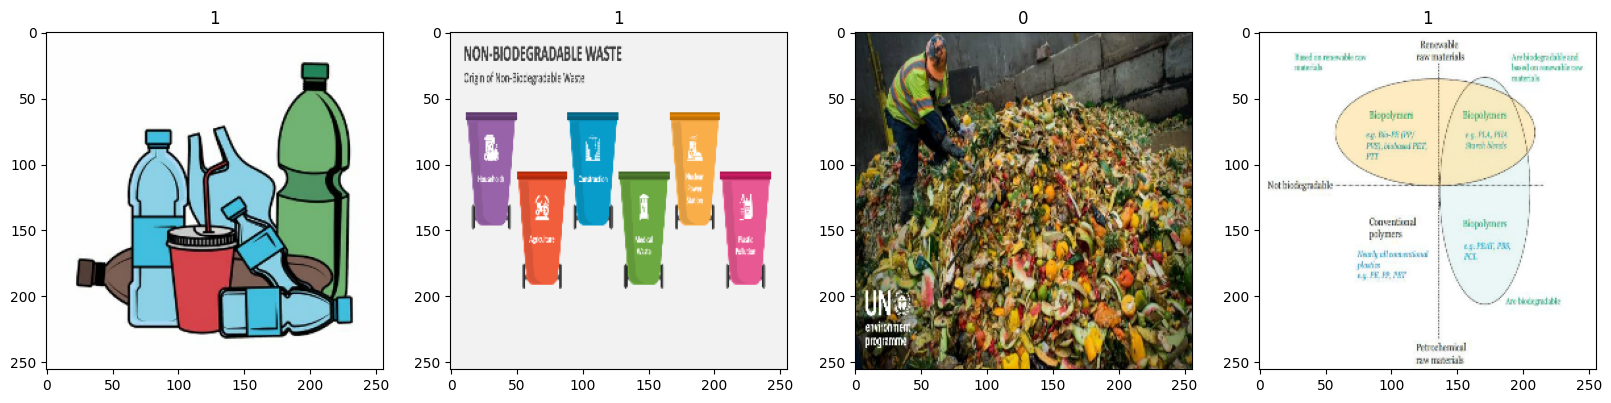

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [71]:
data = data.map(lambda x,y: (x/255, y))

In [72]:
data.as_numpy_iterator().next()

(array([[[[0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          ...,
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ]],
 
         [[0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          ...,
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ]],
 
         [[0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          ...,
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ],
          [0.8980392 , 0.9411765 , 0.8235294 ]],
 
         ...,
 
         [[0.8980392 , 0.9411765 , 0.8235294 ],
          [0.89803

# 5. Split Data

In [73]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [105]:
train_size

7

In [106]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [107]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [109]:
model = Sequential()

In [110]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [111]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [113]:
logdir='logs'

In [114]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [115]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 752ms/step - loss: 0.6109 - accuracy: 0.6830 - val_loss: 0.6524 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 6s 730ms/step - loss: 0.5037 - accuracy: 0.7411 - val_loss: 0.3278 - val_accuracy: 0.9219
Epoch 3/20
7/7 [==============================] - 6s 828ms/step - loss: 0.4338 - accuracy: 0.7812 - val_loss: 0.3449 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 6s 810ms/step - loss: 0.3990 - accuracy: 0.8259 - val_loss: 0.3382 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 7s 966ms/step - loss: 0.2802 - accuracy: 0.8750 - val_loss: 0.2575 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.2129 - accuracy: 0.9286 - val_loss: 0.1203 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 7s 840ms/step - loss: 0.2052 - accuracy: 0.9062 - val_loss: 0.1394 - val_accuracy: 0.9531
Epoch 8/20
7/7 [=======

# 8. Plot Performance

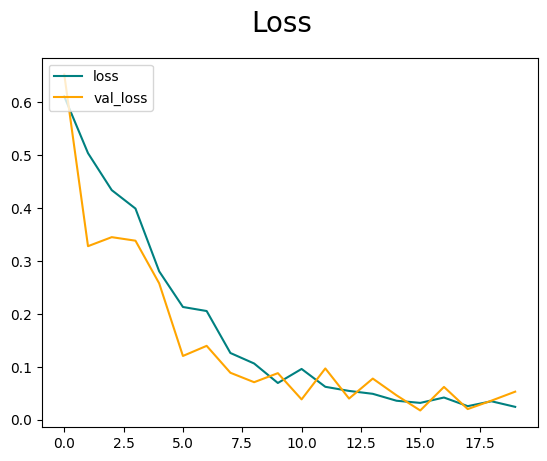

In [134]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

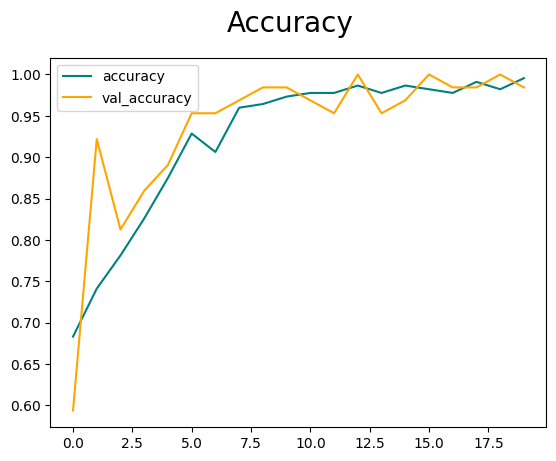

In [135]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [146]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [147]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [148]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [149]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [150]:
import cv2

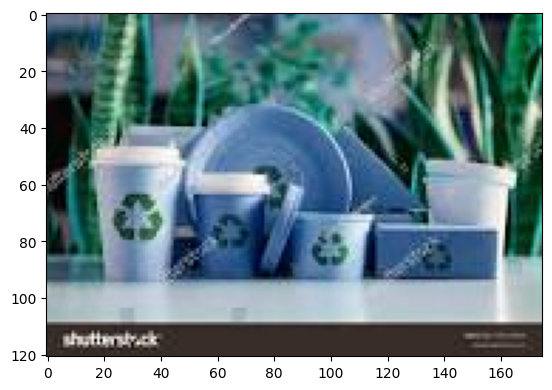

In [151]:
img = cv2.imread('testimages.jpeg')
plt.imshow(img)
plt.show()

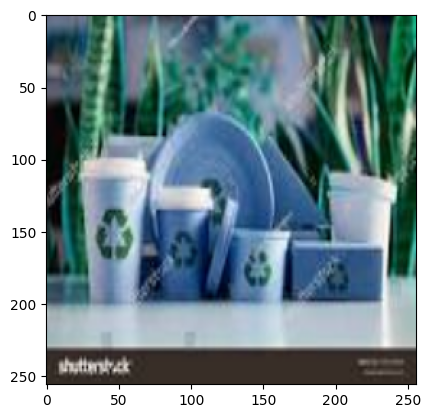

In [152]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [153]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [154]:
yhat

array([[0.99997485]], dtype=float32)

In [155]:
if yhat > 0.5: 
    print(f'Predicted class is Biodegradable')
else:
    print(f'Predicted class is Non-Biodegradable')

Predicted class is Biodegradable


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))